In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Indexing bam file

In [ ]:
!apt-get install -y samtools
!samtools sort -o/content/HG002_10X_R9_CHR21_sorted.bam /content/drive/MyDrive/Task2/HG002_10X_R9_CHR21.bam

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
[bam_sort_core] merging from 1 files and 1 in-memory blocks...


In [ ]:
!samtools index /content/HG002_10X_R9_CHR21_sorted.bam

# Generating vcf file using dysgu

In [ ]:
%pip install dysgu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 70.4 MB/s eta 0:00:00
  Created wheel for superintervals: filename=superintervals-0.2.10-cp311-cp311-linux_x86_64.whl size=397802 sha256=b000defdab5c948a729ea4e665fc69062ea413ae7ea690fb81fd28a1304a887c
  Stored in directory: /root/.cache/pip/wheels/ea/f7/5b/0d152920a35493ece95b59de949e57bf96421f9e65e92ba2af
Successfully built superintervals


In [ ]:
!dysgu run -x /content/drive/MyDrive/Task2/chr21.fa /content/dysgu_results /content/drive/MyDrive/Task2/HG002_10X_R9_CHR21.bam > /content/result.vcf

2025-05-14 19:21:23,065 [INFO   ]  [dysgu-run] Version: 1.8.3
2025-05-14 19:21:23,065 [INFO   ]  run -x /content/drive/MyDrive/Task2/chr21.fa /content/dysgu_results /content/drive/MyDrive/Task2/HG002_10X_R9_CHR21.bam
2025-05-14 19:21:23,065 [INFO   ]  Destination: /content/dysgu_results
2025-05-14 19:21:35,463 [INFO   ]  dysgu fetch /content/drive/MyDrive/Task2/HG002_10X_R9_CHR21.bam written to /content/dysgu_results/HG002_10X_R9_CHR21.dysgu_reads.bam, n=22980, time=0:00:12 h:m:s
2025-05-14 19:21:35,463 [INFO   ]  Input file is: /content/dysgu_results/HG002_10X_R9_CHR21.dysgu_reads.bam
2025-05-14 19:21:35,944 [WARNING]  Warning: no @RG, using input file name as sample name for output: HG002_10X_R9_CHR21.dysgu_reads
2025-05-14 19:21:35,945 [INFO   ]  Sample name: HG002_10X_R9_CHR21.dysgu_reads
2025-05-14 19:21:35,945 [INFO   ]  Writing vcf to stdout
2025-05-14 19:21:35,945 [INFO   ]  Running pipeline
2025-05-14 19:21:47,227 [INFO   ]  Inferred read length: 20323.0
2025-05-14 19:21:47,22

In [ ]:
!head /content/result.vcf

##fileformat=VCFv4.2
##source=DYSGU
##FILTER=<ID=PASS,Description="All filters passed">
##FILTER=<ID=lowProb,Description="Probability below threshold set with --thresholds">
##INFO=<ID=SVTYPE,Number=1,Type=String,Description="Type of structural variant">
##INFO=<ID=SVLEN,Number=1,Type=Integer,Description="Difference in length between REF and ALT alleles">
##INFO=<ID=END,Number=1,Type=Integer,Description="End position of the variant described in this record">
##INFO=<ID=CHR2,Number=1,Type=String,Description="Chromosome for END coordinate in case of a translocation">
##INFO=<ID=CHR2_POS,Number=1,Type=Integer,Description="Chromosome position for END coordinate in case of a translocation">
##INFO=<ID=GRP,Number=1,Type=Integer,Description="Group id for complex SVs">


# Sniffles

In [ ]:
!pip install sniffles

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:
!sniffles -i /content/HG002_10X_R9_CHR21_sorted.bam \
          -v /content/sniffles_chr21.vcf \
          --reference /content/drive/MyDrive/Task2/chr21.fa


2025-05-14 19:22:52,527 INFO sniffles.main (3711): Running Sniffles2, build 2.6.2
2025-05-14 19:22:52,527 INFO sniffles.main (3711):   Run Mode: call_sample
2025-05-14 19:22:52,527 INFO sniffles.main (3711):   Start on: 2025/05/14 19:22:52
2025-05-14 19:22:52,527 INFO sniffles.main (3711):   Working dir: /content
2025-05-14 19:22:52,527 INFO sniffles.main (3711):   Used command: /usr/local/bin/sniffles -i /content/HG002_10X_R9_CHR21_sorted.bam -v /content/sniffles_chr21.vcf --reference /content/drive/MyDrive/Task2/chr21.fa
2025-05-14 19:22:52,527 INFO sniffles.main (3711): ==============================
2025-05-14 19:22:52,549 INFO sniffles.main (3711): Opening for reading: /content/HG002_10X_R9_CHR21_sorted.bam
2025-05-14 19:22:52,551 INFO sniffles.main (3711): Opening for reading: /content/drive/MyDrive/Task2/chr21.fa
2025-05-14 19:22:52,561 INFO sniffles.main (3711): Opening for writing: /content/sniffles_chr21.vcf (single-sample, sorted)
2025-05-14 19:22:52,564 INFO sniffles.main (

# CuteSV

In [ ]:
!pip install CuteSV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 988.6/988.6 kB 57.4 MB/s eta 0:00:00
  Created wheel for CuteSV: filename=cuteSV-2.1.2-py3-none-any.whl size=61667 sha256=f775adac4e62e9c0693c342d21eb30647bf15dcfa4a271d1d5b98a63d948f04f
  Stored in directory: /root/.cache/pip/wheels/57/09/07/f31210a58b02924277f0542eecdf491e455263484c8b808099
  Created wheel for Cigar: filename=cigar-0.1.3-py3-none-any.whl size=4019 sha256=838cd0c8dbf29b4f716f27a3567c6c33d3bff4e066fc7399a9d4480cb6c7f545
  Stored in directory: /root/.cache/pip/wheels/f9/f0/1a/b26850ce8988ee2241b3b83dbb76688daa441d76d58b3ab932
Successfully built CuteSV Cigar


In [ ]:
!mkdir tmp_cutesv
!cuteSV /content/HG002_10X_R9_CHR21_sorted.bam \
        /content/drive/MyDrive/Task2/chr21.fa \
        /content/cutesv_chr21.vcf \
        /content/tmp_cutesv

2025-05-14 19:23:41,474 [INFO] Running /usr/local/bin/cuteSV /content/HG002_10X_R9_CHR21_sorted.bam /content/drive/MyDrive/Task2/chr21.fa /content/cutesv_chr21.vcf /content/tmp_cutesv
2025-05-14 19:23:41,476 [INFO] The total number of chromsomes: 24
2025-05-14 19:23:41,542 [INFO] Finished chr1:0-10000000.
2025-05-14 19:23:41,544 [INFO] Finished chr1:20000000-30000000.
2025-05-14 19:23:41,546 [INFO] Finished chr1:30000000-40000000.
2025-05-14 19:23:41,546 [INFO] Finished chr1:40000000-50000000.
2025-05-14 19:23:41,548 [INFO] Finished chr1:50000000-60000000.
2025-05-14 19:23:41,549 [INFO] Finished chr1:10000000-20000000.
2025-05-14 19:23:41,553 [INFO] Finished chr1:60000000-70000000.
2025-05-14 19:23:41,554 [INFO] Finished chr1:70000000-80000000.
2025-05-14 19:23:41,555 [INFO] Finished chr1:80000000-90000000.
2025-05-14 19:23:41,556 [INFO] Finished chr1:90000000-100000000.
2025-05-14 19:23:41,558 [INFO] Finished chr1:100000000-110000000.
2025-05-14 19:23:41,558 [INFO] Finished chr1:11000

In [ ]:
!head result.vcf -n 300

##fileformat=VCFv4.2
##source=DYSGU
##FILTER=<ID=PASS,Description="All filters passed">
##FILTER=<ID=lowProb,Description="Probability below threshold set with --thresholds">
##INFO=<ID=SVTYPE,Number=1,Type=String,Description="Type of structural variant">
##INFO=<ID=SVLEN,Number=1,Type=Integer,Description="Difference in length between REF and ALT alleles">
##INFO=<ID=END,Number=1,Type=Integer,Description="End position of the variant described in this record">
##INFO=<ID=CHR2,Number=1,Type=String,Description="Chromosome for END coordinate in case of a translocation">
##INFO=<ID=CHR2_POS,Number=1,Type=Integer,Description="Chromosome position for END coordinate in case of a translocation">
##INFO=<ID=GRP,Number=1,Type=Integer,Description="Group id for complex SVs">
##INFO=<ID=NGRP,Number=1,Type=Integer,Description="Number of SVs in group">
##INFO=<ID=RT,Number=1,Type=String,Description="Type of input reads, 1=paired-end, 2=pacbio, 3=nanopore">
##INFO=<ID=CT,Number=1,Type=String,Description

In [ ]:
import pandas as pd
import os

def encode_deletions_from_vcfs(vcf_paths):
    result = {}

    for vcf_path in vcf_paths:
        deletions = []
        tool_name = os.path.splitext(os.path.basename(vcf_path))[0]


        with open(vcf_path, 'r') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                fields = line.strip().split('\t')
                chrom = fields[0]
                pos = int(fields[1])
                ref = fields[3]
                alt = fields[4]
                info = fields[7]

                if 'SVTYPE=DEL' in info:
                    svlen = None
                    end = None

                    for entry in info.split(';'):
                        if entry.startswith('SVLEN='):
                            try:
                                svlen = abs(int(entry.split('=')[1]))
                            except:
                                svlen = None
                        elif entry.startswith('END='):
                            try:
                                end = int(entry.split('=')[1])
                            except:
                                end = None
                    if svlen is None and end is not None:
                        svlen = abs(end - pos)

                    if svlen:
                        deletions.append({
                            'CHROM': chrom,
                            'POS': pos,
                            'SVLEN': svlen
                        })

            result[tool_name] = pd.DataFrame(deletions)



    return result

In [ ]:
deletion_data = encode_deletions_from_vcfs(["/content/result.vcf"])

# PUNKT 2

In [2]:

!pip install pysam truvari scikit-learn umap-learn matplotlib tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.3/882.3 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 97.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 20.0 MB/s eta 0:00:00
  Created wheel for bwapy: filename=bwapy-0.1.4-cp311-cp311

In [3]:
BAM   = "/content/drive/MyDrive/Task2/HG002_10X_R9_CHR21.bam"
REF   = "/content/drive/MyDrive/Task2/chr21.fa"

VCF_SNIFF  = "/content/drive/MyDrive/Task2/sniffles_chr21.vcf"
VCF_CUTESV = "/content/drive/MyDrive/Task2/cutesv_chr21.vcf"
VCF_DYSGU  = "/content/drive/MyDrive/Task2/result.vcf"


Funkcja „deletion encoding”



    

In [4]:
import pysam
import cv2
import numpy as np
from collections import defaultdict

class ImageEncoder:

    def encode_to_image(self, row_id, image, image_start, start, end, sv_len, encoded_row):
        if image_start >= start: # if read starts before start of 3 x sv_len window
            encode_start = image_start-start
            encode_end = image_start-start+sv_len*3
            encoded_image = encoded_row[encode_start:encode_end]
            image[row_id, 0:encoded_image.shape[0], :] = encoded_image

        else:
            encode_start = abs(image_start-start)
            encode_end = sv_len*3 - encode_start
            encoded_image = encoded_row[0:encode_end]
            image[row_id, encode_start:encode_start+encoded_image.shape[0], :] = encoded_image

        return image

    def encode(self, chr_, bp, bam_file, mutation_type="DEL"):
        sv_len = bp[1] - bp[0]

        rows_dict = defaultdict(list)

        #iterate over reads mapped to mutation region
        for read in bam_file.fetch(chr_, bp[0], bp[1], multiple_iterators=True):
            # filterout low quality reads
            if read.mapping_quality < 60:
                continue

            counter = 0

            #initialize empty array (zeros - black color) depends of read lenght
            row = np.zeros((read.reference_end-read.reference_start, 3))

            for ct in read.cigartuples:
                # Red color as a mapped nucleotides
                if ct[0] in [0]:
                    row[counter:counter+ct[1], :] = [1, 0, 0]
                    counter += ct[1]
                # Green color as a deletions
                elif ct[0] in [2]:
                    row[counter:counter+ct[1], :] = [0, 1, 0]
                    counter += ct[1]
                # Blue color as a insterions. We encode insertions only for mutations_type=INS and only in mutation region, not in extended space
                elif ct[0] in [1] and (counter >= bp[0] - read.reference_start - sv_len and counter <= bp[1] - read.reference_start + sv_len) and mutation_type == "INS":
                    row[counter:counter+ct[1], :] = [0, 0, 1]
                    counter += ct[1]

            rows_dict[read.query_name].append([row, read.reference_start,read.reference_end])

        if not rows_dict:
            return None
        #print(len(rows_dict), bp)
        #initialize variant image with zeros
        image = np.zeros(
            (
                len(rows_dict.keys()),
                sv_len*3,
                3
            )
        )

        # image start relative to position on chromosome
        image_start = bp[0] - sv_len

        row_id = 0
        for key, value in rows_dict.items():
            # encode only reads mapped to single region
            if len(value) == 1:
                encoded_row, start, end = value[0]
                image = self.encode_to_image(row_id, image, image_start, start, end, sv_len, encoded_row)
                row_id += 1
            elif len(value) == 2:
                value = sorted(value, key=lambda x: x[1])
                el1 = value[0]
                el2 = value[1]
                image = self.encode_to_image(row_id, image, image_start, el1[1], el1[2], sv_len, el1[0])
                image = self.encode_to_image(row_id, image, image_start, el2[1], el2[2], sv_len, el2[0])
                image[row_id, el1[2]-image_start:el2[1]-image_start, :] = [0, 1, 0]
                row_id += 1
        # if less than two valid reads mapped - return None
        if row_id < 2:
            return None

        resized_image = cv2.resize(image[:row_id, :], (50, 50))
        return np.array(resized_image)

Wizualizacja (PCA, t-SNE, UMAP)


Wybrana delecja: chr21:5227395-5227505  (len = 110 bp)


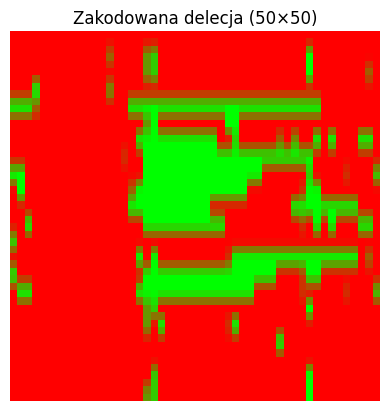

True

In [8]:

variants = []
for p,c in [(VCF_SNIFF,"sniff"),(VCF_CUTESV,"cute"),(VCF_DYSGU,"dysgu")]:
    variants += list(get_dels(p,c))

chrom  = variants[0]["chrom"]
start  = variants[0]["start"]
end    = variants[0]["end"]

print(f"Wybrana delecja: {chrom}:{start}-{end}  (len = {end-start} bp)")

bam      = pysam.AlignmentFile("/content/drive/MyDrive/Task2/HG002_10X_R9_CHR21_sorted.bam", "rb")
coder    = ImageEncoder()

img = coder.encode(chrom, (start, end), bam, mutation_type="DEL")
bam.close()

if img is None:
    raise ValueError("Nie udało się zakodować tej delecji – spróbuj inną.")

import matplotlib.pyplot as plt
import cv2

plt.imshow(img)
plt.axis("off")
plt.title("Zakodowana delecja (50×50)")
plt.show()

out_path = "/content/drive/MyDrive/Task2/encoded_deletion.png"
cv2.imwrite(out_path, (img * 255).astype("uint8")[:, :, ::-1])


encode: 100%|██████████| 400/400 [00:30<00:00, 13.13it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


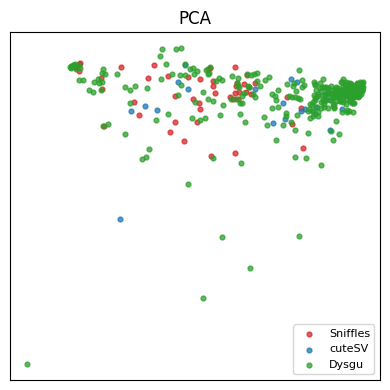

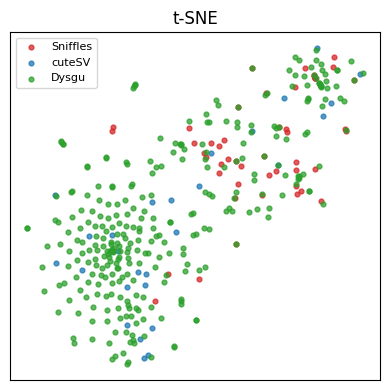

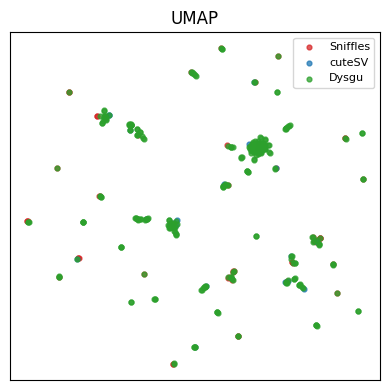

In [11]:

VCF_SNIFF  = "/content/drive/MyDrive/Task2/sniffles_chr21.vcf"
VCF_CUTESV = "/content/drive/MyDrive/Task2/cutesv_chr21.vcf"
VCF_DYSGU  = "/content/drive/MyDrive/Task2/result.vcf"
BAM_PATH   = "/content/drive/MyDrive/Task2/HG002_10X_R9_CHR21_sorted.bam"
MAX_IMAGES = 400


import pysam, random, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm

def get_dels(vcf, tag):
    for r in pysam.VariantFile(vcf):
        if r.info.get("SVTYPE")=="DEL":
            yield dict(caller=tag, chrom=r.chrom, start=r.pos, end=r.stop)

var = [*get_dels(VCF_SNIFF,"Sniffles"),
       *get_dels(VCF_CUTESV,"cuteSV"),
       *get_dels(VCF_DYSGU ,"Dysgu")]
var = random.sample(var, k=min(MAX_IMAGES,len(var)))

enc = ImageEncoder(); bam = pysam.AlignmentFile(BAM_PATH,"rb")
imgs, labs = [], []
for v in tqdm(var,desc="encode"):
    img = enc.encode(v["chrom"],(v["start"],v["end"]),bam,"DEL")
    if img is not None:
        imgs.append(img.astype("float32").ravel())
        labs.append(v["caller"])
bam.close(); X = np.stack(imgs)


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

emb = { "PCA" : PCA (2).fit_transform(X),
        "t-SNE": TSNE(2, init="pca", learning_rate="auto").fit_transform(X),
        "UMAP": umap.UMAP(2).fit_transform(X) }

clr = {"Sniffles":"tab:red", "cuteSV":"tab:blue", "Dysgu":"tab:green"}

def plot(e, title):
    plt.figure(figsize=(4,4))
    for k,c in clr.items():
        m = [i for i,l in enumerate(labs) if l==k]
        plt.scatter(e[m,0], e[m,1], c=c, s=12, alpha=.75, label=k)
    plt.title(title); plt.legend(fontsize=8); plt.xticks([]); plt.yticks([])
    plt.tight_layout(); plt.show()

for t,e in emb.items(): plot(e, t)


-------------------ZAPIS-------------------